# Credit Risk Ensemble Techniques

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

# Read the CSV and Perform Basic Data Cleaning

In [4]:
# Load the data
file_path = Path('Resources/lending_data.csv')
df=pd.read_csv(file_path)

df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,own,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,own,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,rent,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,own,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,mortgage,53000,0.433962,5,1,23000,low_risk


In [5]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000


# Split the Data into Training and Testing

In [6]:
# Create our features
# Create features by exluding loan status
x_cols = [i for i in df.columns if i not in ("loan_status")]
X = df[x_cols]

# Create target with loan status
y = df.loan_status.to_frame()

#Encode categorical data
X=pd.get_dummies(X, columns=["homeowner"])
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,homeowner_mortgage,homeowner_own,homeowner_rent
0,10700.0,7.672,52800,0.431818,5,1,22800,0,1,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0,1,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0,0,1
3,10700.0,7.664,52700,0.430740,5,1,22700,0,1,0
4,10800.0,7.698,53000,0.433962,5,1,23000,1,0,0


In [7]:
X.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,homeowner_mortgage,homeowner_own,homeowner_rent
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.497472,0.398911,0.103616
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.499997,0.489678,0.304764
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000,0.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000,0.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,1.000000,1.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000,1.000000,1.000000


In [8]:
# Check the balance of our target values
# YOUR CODE HERE
y['loan_status'].value_counts()

low_risk     75036
high_risk     2500
Name: loan_status, dtype: int64

In [9]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y)

# Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble AdaBoost classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Print the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier onely, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [15]:
# Resample the training data with the RandomOversampler
# YOUR CODE HERE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_resampled, y_resampled)
y_pred_BRF = brf.predict(X_test)

In [16]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred_BRF)

0.9538684578069194

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, ax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    print('')

    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.sca(ax)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

[[  572    53]
 [  140 18619]]



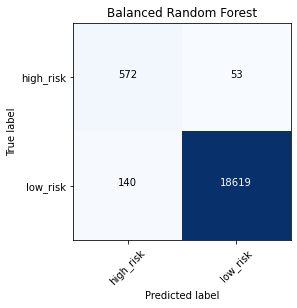

In [30]:
# Display the confusion matrix
cm_balrf=confusion_matrix(y_test, y_pred_BRF)
fig, ax = plt.subplots()
plot_confusion_matrix(cm_balrf, classes=np.unique(y_pred_BRF), ax=ax, title='Balanced Random Forest')

In [19]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_BRF))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.80      0.92      0.99      0.86      0.95      0.90       625
   low_risk       1.00      0.99      0.92      0.99      0.95      0.92     18759

avg / total       0.99      0.99      0.92      0.99      0.95      0.91     19384



In [32]:
# List the features sorted in descending order by feature importance
brf.feature_importances_

array([7.93135725e-02, 2.86606774e-01, 2.17331618e-01, 1.58386242e-01,
       4.91950994e-02, 4.48973813e-06, 2.07514782e-01, 5.64082081e-04,
       6.95370764e-04, 3.87968932e-04])

[(0.2866067744190758, 'interest_rate'), (0.21733161787168204, 'borrower_income'), (0.20751478234577628, 'total_debt'), (0.15838624190717274, 'debt_to_income'), (0.0793135725260875, 'loan_size'), (0.04919509941564198, 'num_of_accounts'), (0.000695370763714681, 'homeowner_own'), (0.0005640820806975418, 'homeowner_mortgage'), (0.0003879689320242731, 'homeowner_rent'), (4.489738127100887e-06, 'derogatory_marks')]
Feature ranking:
1. feature 1 (0.286607)
2. feature 2 (0.217332)
3. feature 6 (0.207515)
4. feature 3 (0.158386)
5. feature 0 (0.079314)
6. feature 4 (0.049195)
7. feature 8 (0.000695)
8. feature 7 (0.000564)
9. feature 9 (0.000388)
10. feature 5 (0.000004)


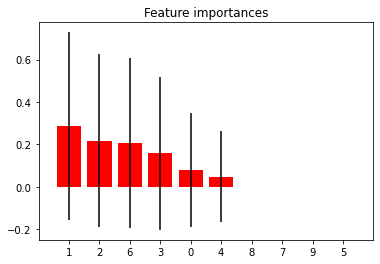

In [36]:
importances = brf.feature_importances_
print(sorted(zip(brf.feature_importances_, X.columns), reverse=True))

std = np.std([tree.feature_importances_ for tree in brf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Easy Ensemble AdaBoost Classifier

In [14]:
# Train the Classifier
# YOUR CODE HERE

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [ ]:
# Calculated the balanced accuracy score
# YOUR CODE HERE

In [ ]:
# Display the confusion matrix
# YOUR CODE HERE

In [ ]:
# Print the imbalanced classification report
# YOUR CODE HERE